In [1]:
from cbs import *
from mapf import *
from regional_mapf import *
from matplotlib import pyplot as plt

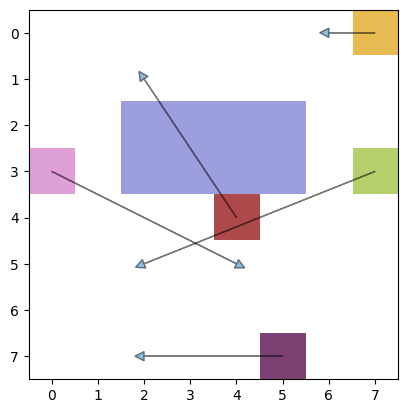

In [2]:
# basic CBS problem
obstacles = column_lattice_obstacles(2,4,2,2)
env = GridWorld((8,8), obstacles)
fig, ax = plt.subplots()
n_agents = 5
agent_ids = list(range(n_agents))
nodes = list(env.G.nodes)
idx = np.random.choice(len(nodes), n_agents, replace=False)
start_pos = dict((i, nodes[idx[i]]) for i in range(n_agents))
paths = dict((i, Path([PathVertex(start_pos[i], 0)])) for i in range(n_agents))
nodes = list(env.G.nodes)
idx = np.random.choice(len(nodes), n_agents, replace=False)
goal_pos = dict((i, nodes[idx[i]]) for i in range(n_agents))
goals = dict((id, LocationGoal(goal_pos[id])) for id in range(n_agents))
draw_environment(ax,env,start_pos,goal_pos)

In [3]:
action_gen = GridWorldActionGenerator(env)
node = CBSNode(paths, goals, action_gen)
result = conflict_based_search(node, verbose=True, maxtime=60.)

conflict between 4 at t = 5, p1 = (5, 3), p2 = (5, 4) and 0 at t = 5, p1 = (5, 4), p2 = (5, 3)
cbs problem solved


MovieWriter ffmpeg unavailable; using Pillow instead.


8


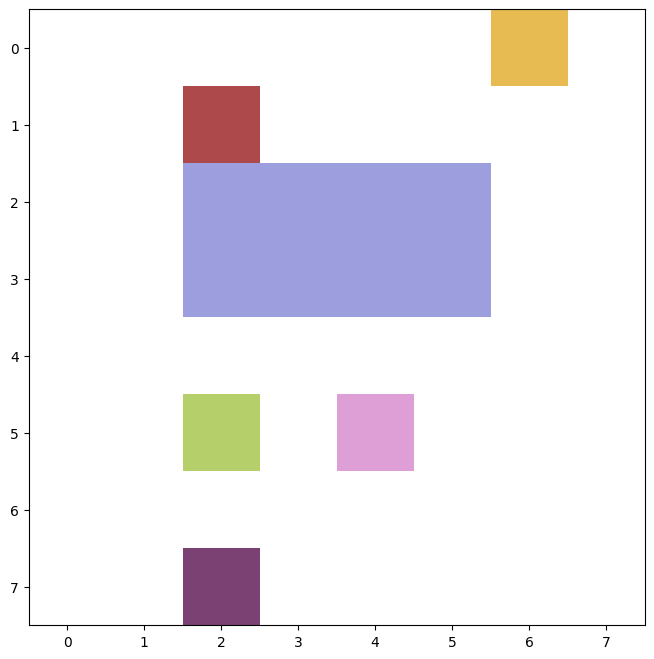

In [4]:
animation = MAPFAnimation(env, MAPFSolution(result.paths))
ani = animation.animate()
ani.save('foo.gif')

In [5]:
nrows = ncols = 5
env = ColumnLatticeEnvironment(nrows, ncols, 2, 4, 2, 2)

In [8]:
partial_paths, region_paths, final_goals = random_problem(100, env, path_cutoff = 5)
node = rcbs_init(env, partial_paths, region_paths, final_goals)
update_rcbsnode(node, 30., 10., False)
queue = [node]
result = rcbs(env, queue, maxtime = 60., cbs_maxtime = 5., astar_maxtime = 5., verbose=True)

R1=(0, 0), id1=70, c1=t = 5, p1 = (4, 7), p2 = (4, 8), R2=(0, 1), id2=17, c2=t = 5, p1 = (4, 8), p2 = (4, 7)
rcbs transferring agents to next region
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 0, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 0, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 0, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 0, 70: 1, 71: 1, 72: 1, 73: 0, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 0, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}
A* infeasibility
A* infeasibility
A* infeasibility
A* infeasibility
A* infeasibility
A* infeasibility
R1=(2, 3), id1=87, c1=t = 10, p1 = (12, 30), p2 = (11, 30)

35


MovieWriter ffmpeg unavailable; using Pillow instead.


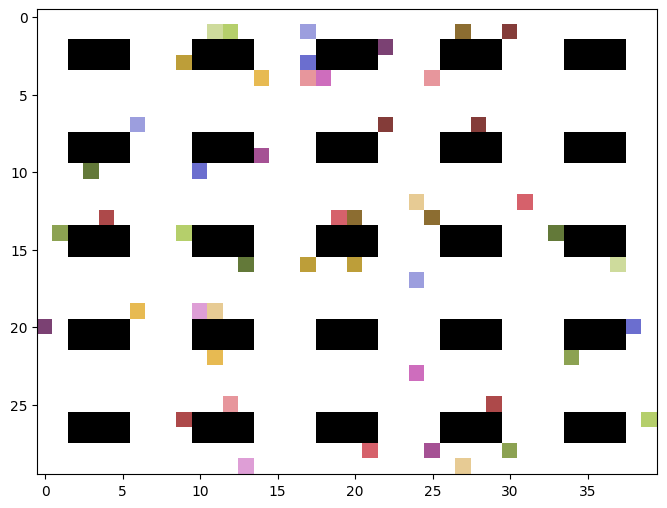

In [7]:
animation = MAPFAnimation(env, result)
ani = animation.animate()
ani.save('foo.gif')